In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("C:\\Users\\alive\\archive\\housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace  = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
train_data = X_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4655,-118.33,34.05,44.0,1574.0,390.0,1323.0,404.0,2.5284,<1H OCEAN,226300.0
4025,-118.53,34.17,18.0,6430.0,1412.0,2897.0,1348.0,3.8550,<1H OCEAN,243800.0
1645,-121.89,37.82,4.0,11444.0,1355.0,3898.0,1257.0,13.2949,INLAND,500001.0
4238,-118.32,34.12,52.0,3410.0,800.0,1218.0,783.0,4.1500,<1H OCEAN,393500.0
15383,-117.20,33.38,14.0,5392.0,821.0,2350.0,810.0,5.0507,<1H OCEAN,291500.0
...,...,...,...,...,...,...,...,...,...,...
9203,-119.64,37.31,15.0,2654.0,530.0,1267.0,489.0,2.8393,INLAND,104400.0
19656,-120.85,37.49,42.0,264.0,72.0,310.0,70.0,1.4063,INLAND,61500.0
523,-122.24,37.77,52.0,1153.0,235.0,481.0,223.0,2.6411,NEAR BAY,241000.0
20120,-120.41,37.88,16.0,744.0,141.0,311.0,122.0,4.4231,INLAND,87500.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

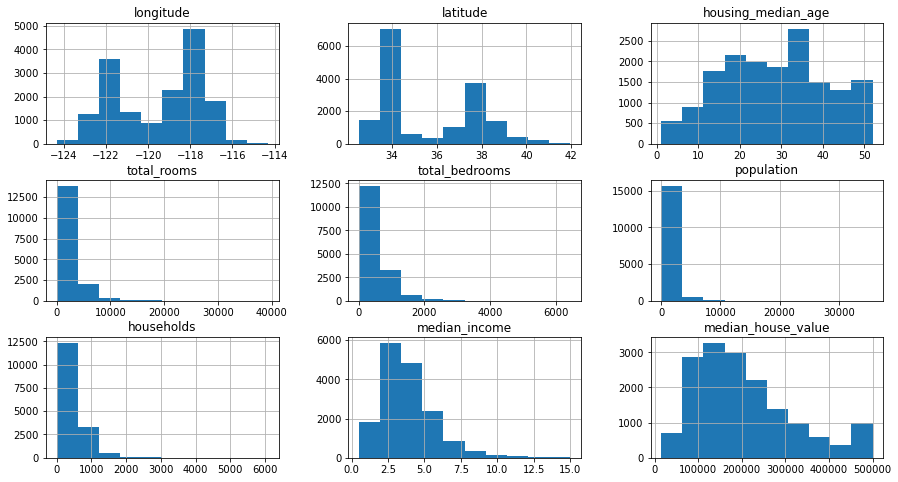

In [11]:
train_data.hist(figsize = (15,8))

<AxesSubplot:>

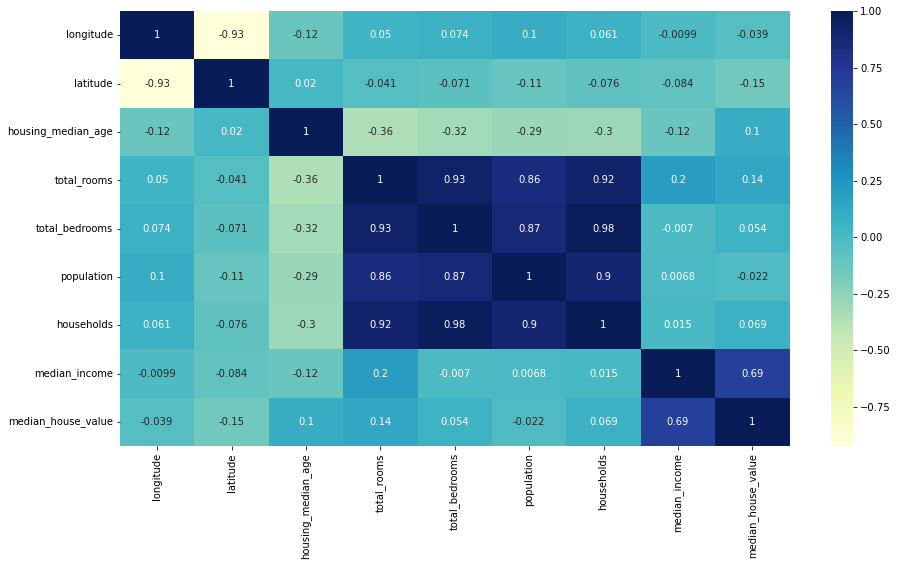

In [12]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [13]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

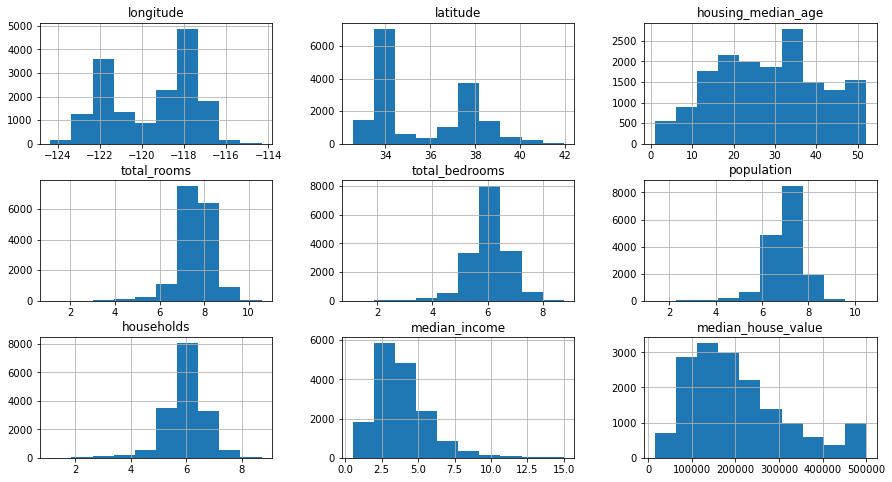

In [14]:
train_data.hist(figsize = (15, 8))

In [15]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7158
INLAND        5205
NEAR OCEAN    2147
NEAR BAY      1834
ISLAND           2
Name: ocean_proximity, dtype: int64

In [16]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4655,-118.33,34.05,44.0,7.362011,5.968708,7.188413,6.003887,2.5284,226300.0,1,0,0,0,0
4025,-118.53,34.17,18.0,8.768885,7.253470,7.971776,7.207119,3.8550,243800.0,1,0,0,0,0
1645,-121.89,37.82,4.0,9.345308,7.212294,8.268475,7.137278,13.2949,500001.0,0,1,0,0,0
4238,-118.32,34.12,52.0,8.134761,6.685861,7.105786,6.664409,4.1500,393500.0,1,0,0,0,0
15383,-117.20,33.38,14.0,8.592857,6.711740,7.762596,6.698268,5.0507,291500.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9203,-119.64,37.31,15.0,7.884200,6.274762,7.145196,6.194405,2.8393,104400.0,0,1,0,0,0
19656,-120.85,37.49,42.0,5.579730,4.290459,5.739793,4.262680,1.4063,61500.0,0,1,0,0,0
523,-122.24,37.77,52.0,7.050989,5.463832,6.177944,5.411646,2.6411,241000.0,0,0,0,1,0
20120,-120.41,37.88,16.0,6.613384,4.955827,5.743003,4.812184,4.4231,87500.0,0,1,0,0,0


<AxesSubplot:>

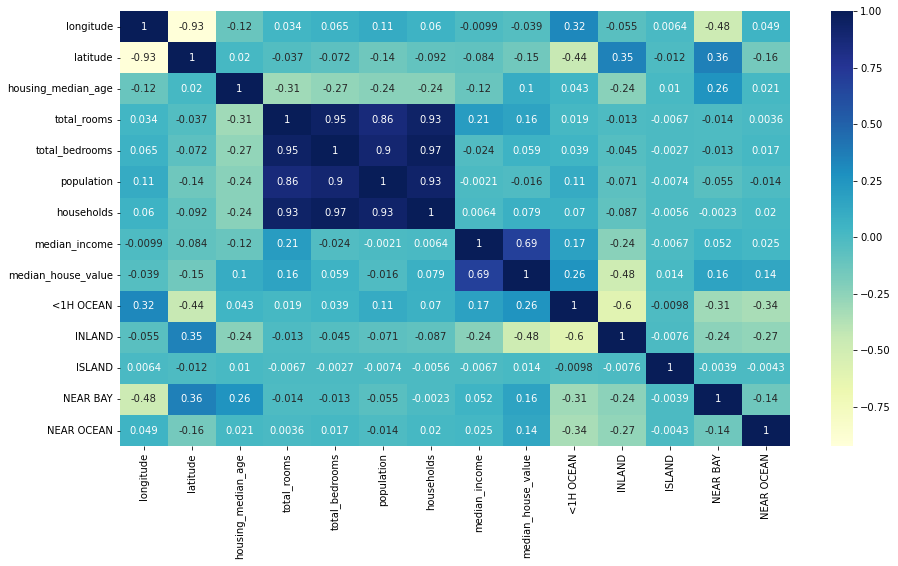

In [18]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

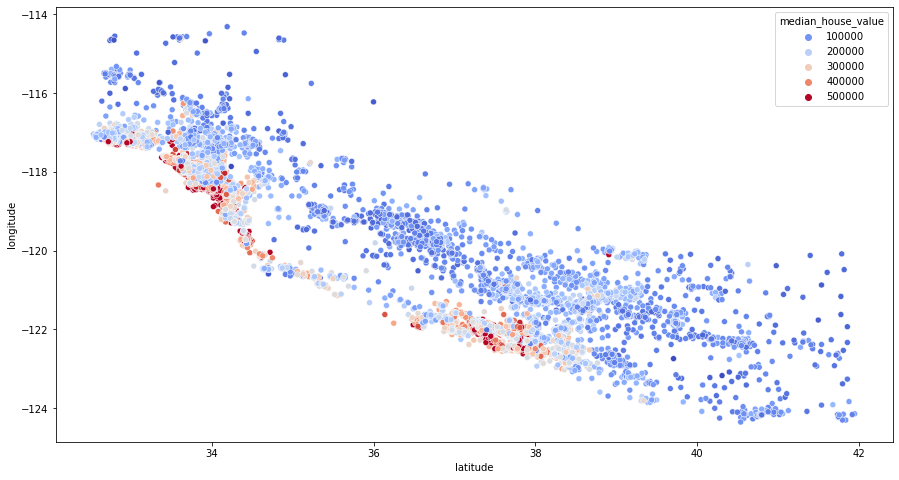

In [19]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = train_data, hue = 'median_house_value', palette= 'coolwarm')


In [20]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<AxesSubplot:>

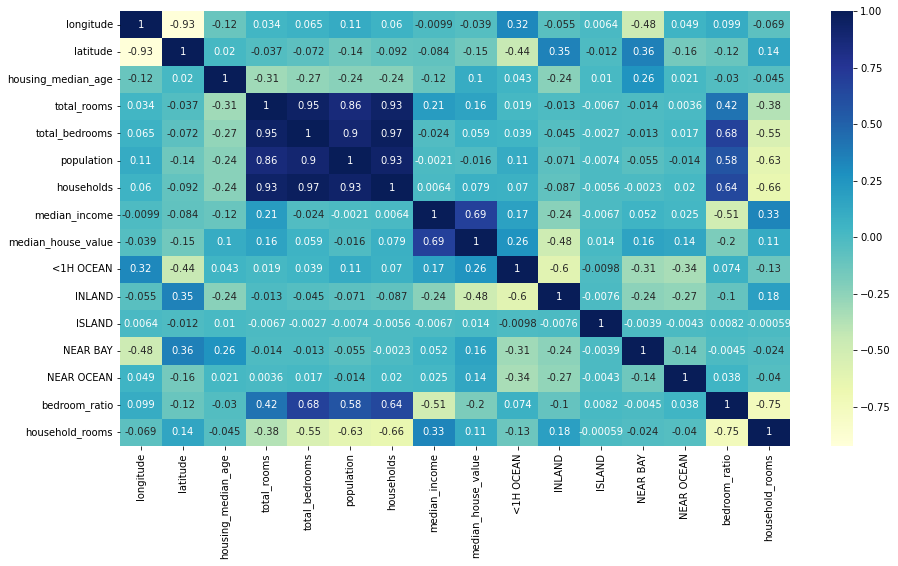

In [21]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [23]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']



In [24]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [25]:
X_test_s = scaler.transform(X_test)

In [26]:
reg.score(X_test, y_test)

0.6881594587816127

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)


RandomForestRegressor()

In [28]:
forest.score(X_test_s, y_test)

0.824744045957464

In [31]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
    
}

grid_search = GridSearchCV(forest, param_grid, cv = 5,
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [32]:
grid_search.best_estimator_


RandomForestRegressor(n_estimators=300)

In [33]:
grid_search.best_estimator_.score(X_test_s, y_test)

0.8244087923692672